In [10]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  # For loading audio files
import numpy as np
import librosa
from IPython.display import Audio, display

# Function to compute zero crossing rate

In [24]:
def zero_crossing_rate(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal))) / 2)
    return zcr

# Function to apply window function
def apply_window(signal, window_type):
    window = np.hamming(len(signal))
    if window_type == 'rectangular':
        window = np.ones(len(signal))
    elif window_type == 'hamming':
        window = np.hamming(len(signal))
    elif window_type == 'hanning':
        window = np.hanning(len(signal))
    return signal * window


# Load speech signal

In [25]:
file_path = r'C:\Users\ibnes\OneDrive\Documents\Sound Recordings\Sampling.wav'   # Change this to your audio file path
signal, sampling_rate = sf.read(file_path)
signal1, sr = librosa.load(file_path, sr=None)
display(Audio(signal1, rate=sr))

# Convert to mono if stereo
if len(signal.shape) > 1:
    signal = signal.mean(axis=1)

# Normalize the signal
signal = signal / np.max(np.abs(signal))

# Compute ZCR for the original signal
zcr_original = zero_crossing_rate(signal)

In [26]:
cut_signal = signal1[int(sr * 2.5):int(sr * 2.53)]
frame_length = int(sr * 0.03)  # 30 ms frame length
hop_length = 512

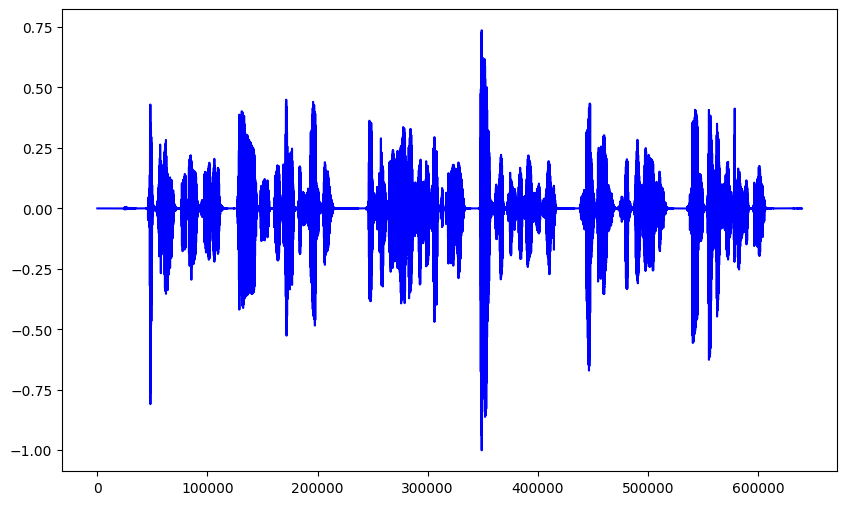

In [27]:
# Apply different window functions and compute ZCR
window_types = ['rectangular', 'hamming', 'hanning','blackman']
zcr_values = []
plt.figure(figsize=(10, 6))
plt.plot(signal, label='Original Signal', color='blue')

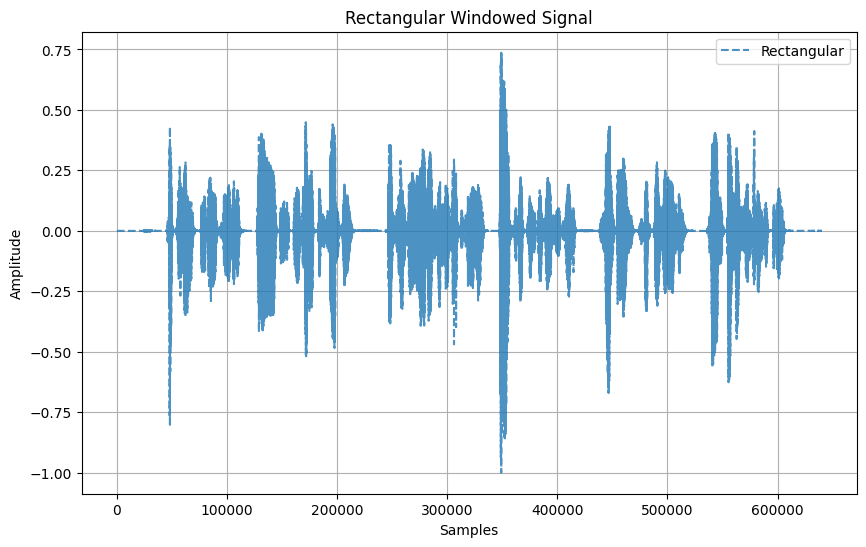

Rectangular Window ZCR: 0.049267862696709644


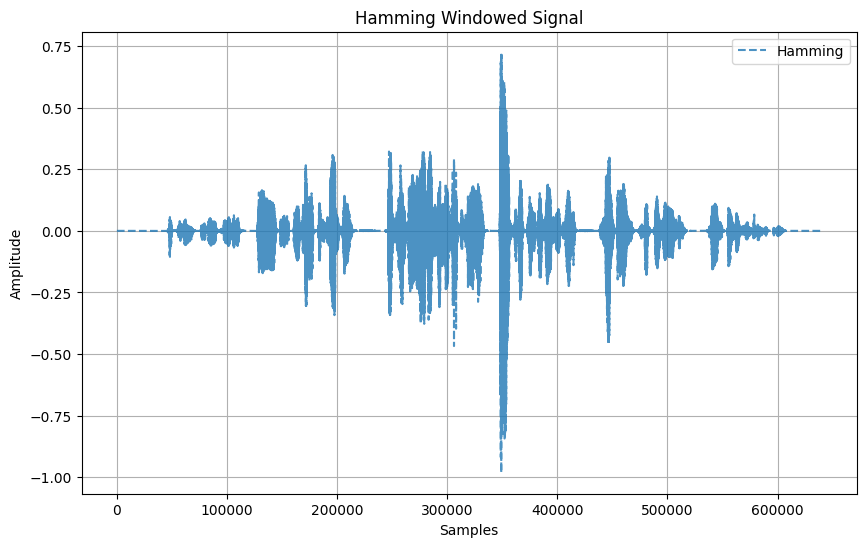

Hamming Window ZCR: 0.049267862696709644


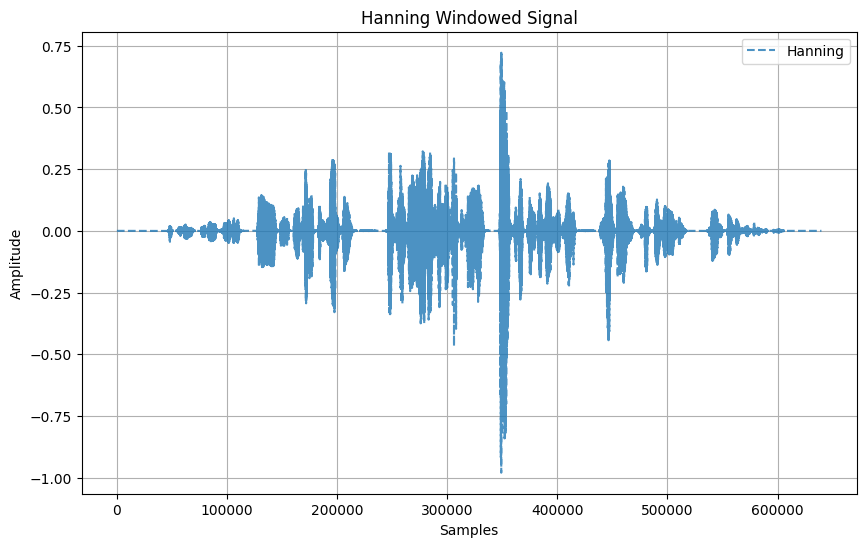

Hanning Window ZCR: 0.049268644143292295


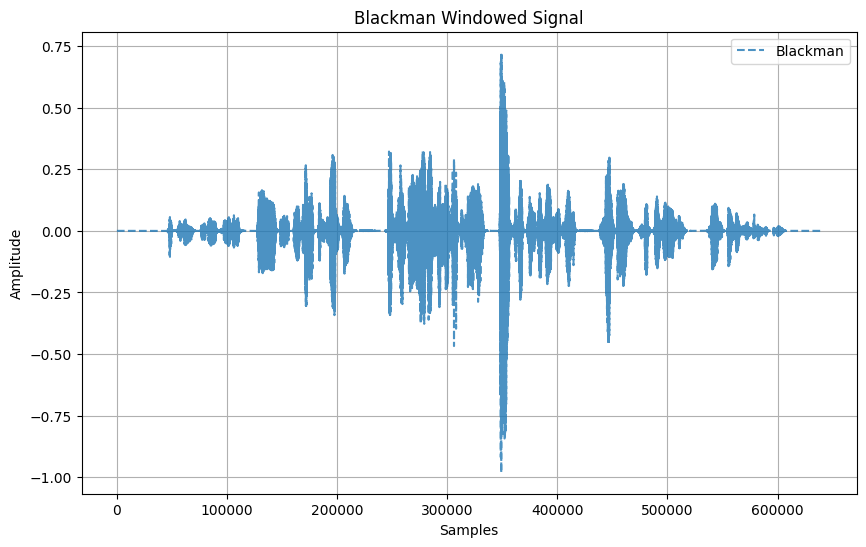

Blackman Window ZCR: 0.049267862696709644


Original ZCR: 0.049267862696709644


In [29]:
for window_type in window_types:
    windowed_signal = apply_window(signal, window_type)
    zcr = zero_crossing_rate(windowed_signal)
    zcr_values.append(zcr)
    plt.figure(figsize=(10, 6))
    plt.plot(windowed_signal, label=window_type.capitalize(), linestyle='--', alpha=0.8)
    plt.title(f'{window_type.capitalize()} Windowed Signal')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"{window_type.capitalize()} Window ZCR:", zcr)
    display(Audio(windowed_signal, rate=sampling_rate))

# Print original ZCR
print("Original ZCR:", zcr_original)